In [1]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torch.utils.data.dataloader import DataLoader
from torch.utils.data import random_split

In [2]:
dataset=MNIST(root='data/',download=True,transform=ToTensor())

In [3]:
dataset

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
# Split the dataset

val_size=10000
train_size=len(dataset)-val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(50000, 10000)

In [5]:
batch_size=128   

In [6]:
# We can create PyTorch data loaders for training and validation.

In [7]:
train_loader=DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_loader=DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

torch.Size([128, 1, 28, 28])


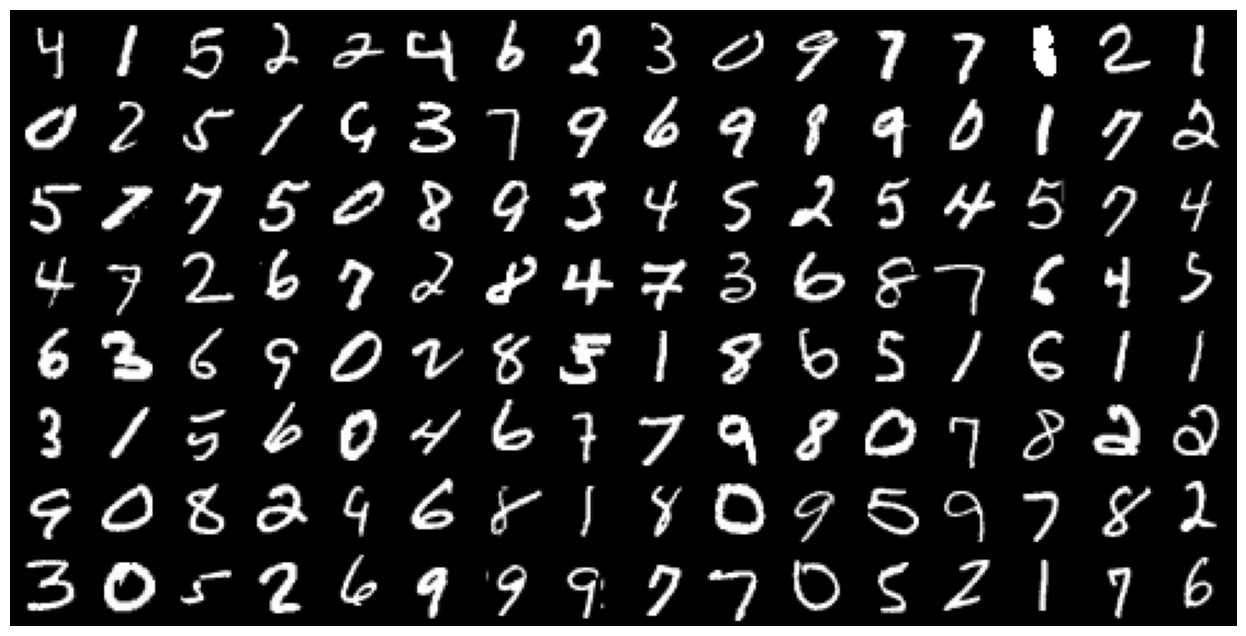

In [8]:
for images, _ in train_loader:
    print(images.shape)
    plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(make_grid(images, nrow=16).permute((1,2,0)))
    break

image.shape: torch.Size([1, 28, 28])
Label: 5


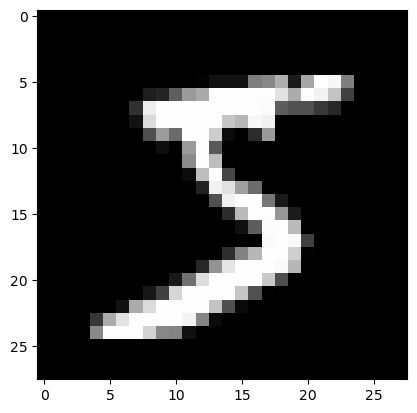

In [9]:
image, label = dataset[0]
print('image.shape:', image.shape)
plt.imshow(image.permute(1, 2, 0), cmap='gray')
print('Label:', label)

In [10]:
for images, labels in train_loader:
    print('images.shape:', images.shape)
    inputs = images.reshape(-1, 784)
    print('inputs.shape:', inputs.shape)
    break

images.shape: torch.Size([128, 1, 28, 28])
inputs.shape: torch.Size([128, 784])


In [11]:
input_size=inputs.shape[-1]
hidden_size=32

In [12]:
layer1=nn.Linear(input_size, hidden_size)

In [13]:
layer1

Linear(in_features=784, out_features=32, bias=True)

In [14]:
inputs.shape

torch.Size([128, 784])

In [15]:
layer1_outputs=layer1(inputs)
print('layer1_outputs.shape:', layer1_outputs.shape)

layer1_outputs.shape: torch.Size([128, 32])


In [16]:
layer1.weight

Parameter containing:
tensor([[-0.0002, -0.0087,  0.0039,  ...,  0.0096, -0.0227, -0.0314],
        [-0.0296, -0.0224,  0.0053,  ..., -0.0185,  0.0167,  0.0167],
        [ 0.0069,  0.0209, -0.0137,  ..., -0.0056,  0.0103,  0.0068],
        ...,
        [ 0.0163,  0.0282,  0.0133,  ..., -0.0176,  0.0047, -0.0031],
        [-0.0180, -0.0039, -0.0105,  ..., -0.0226, -0.0004,  0.0262],
        [ 0.0193,  0.0292,  0.0220,  ...,  0.0087, -0.0257,  0.0200]],
       requires_grad=True)

In [17]:
layer1.bias

Parameter containing:
tensor([-0.0285, -0.0036,  0.0046, -0.0331, -0.0103,  0.0078, -0.0158, -0.0072,
        -0.0087,  0.0181, -0.0280, -0.0009, -0.0191,  0.0176, -0.0233,  0.0096,
         0.0115,  0.0345, -0.0170, -0.0171,  0.0148, -0.0148, -0.0321,  0.0258,
        -0.0292, -0.0285, -0.0332,  0.0092, -0.0072, -0.0201,  0.0065,  0.0162],
       requires_grad=True)

In [18]:
layer1_outputs_direct = inputs @ layer1.weight.t() + layer1.bias
layer1_outputs_direct.shape

torch.Size([128, 32])

In [19]:
torch.allclose(layer1_outputs, layer1_outputs_direct, 1e-3)

True

In [20]:
relu_outputs = F.relu(layer1_outputs)
print('min(layer1_outputs):', torch.min(layer1_outputs).item())
print('min(relu_outputs):', torch.min(relu_outputs).item())

min(layer1_outputs): -0.817046046257019
min(relu_outputs): 0.0


In [21]:
output_size = 10
layer2 = nn.Linear(hidden_size, output_size)

In [22]:
layer2_outputs = layer2(relu_outputs)
print(layer2_outputs.shape)

torch.Size([128, 10])


In [23]:
inputs.shape

torch.Size([128, 784])

In [24]:
F.cross_entropy(layer2_outputs, labels)

tensor(2.3209, grad_fn=<NllLossBackward0>)

In [25]:
# Expanded version of layer2(F.relu(layer1(inputs)))
outputs = (F.relu(inputs @ layer1.weight.t() + layer1.bias)) @ layer2.weight.t() + layer2.bias

In [26]:
outputs

tensor([[-0.0555, -0.0982,  0.2094,  ...,  0.0891,  0.1771,  0.0882],
        [-0.0076, -0.0872,  0.1898,  ...,  0.2229,  0.3316,  0.2775],
        [-0.0541, -0.0772,  0.1994,  ...,  0.0494,  0.3486,  0.1033],
        ...,
        [-0.0437, -0.1112,  0.2034,  ...,  0.0632,  0.3264,  0.1185],
        [ 0.0275,  0.0041,  0.2174,  ...,  0.2229,  0.4739,  0.2451],
        [ 0.0405, -0.0407,  0.1787,  ...,  0.0826,  0.2818,  0.1876]],
       grad_fn=<AddBackward0>)

In [27]:
# Same as layer2(layer1(inputs))
outputs2 = (inputs @ layer1.weight.t() + layer1.bias) @ layer2.weight.t() + layer2.bias

In [28]:
outputs2

tensor([[-0.0271, -0.2196,  0.1623,  ...,  0.2151,  0.2209,  0.0372],
        [-0.0153, -0.1559,  0.0768,  ...,  0.4246,  0.3385,  0.2706],
        [-0.1317, -0.1402,  0.2305,  ...,  0.1652,  0.4276,  0.0313],
        ...,
        [-0.0891, -0.1862,  0.1251,  ...,  0.3045,  0.4840,  0.0607],
        [ 0.0724, -0.1032,  0.0811,  ...,  0.4740,  0.5938,  0.1829],
        [ 0.0354, -0.1819,  0.0297,  ...,  0.3058,  0.3886,  0.1421]],
       grad_fn=<AddBackward0>)

In [29]:
# Create a single layer to replace the two linear layers
combined_layer = nn.Linear(input_size, output_size)

combined_layer.weight.data = layer2.weight @ layer1.weight
combined_layer.bias.data = layer1.bias @ layer2.weight.t() + layer2.bias

In [30]:
# Same as combined_layer(inputs)
outputs3 = inputs @ combined_layer.weight.t() + combined_layer.bias

In [31]:
outputs3

tensor([[-0.0271, -0.2196,  0.1623,  ...,  0.2151,  0.2209,  0.0372],
        [-0.0153, -0.1559,  0.0768,  ...,  0.4246,  0.3385,  0.2706],
        [-0.1317, -0.1402,  0.2305,  ...,  0.1652,  0.4276,  0.0313],
        ...,
        [-0.0891, -0.1862,  0.1251,  ...,  0.3045,  0.4840,  0.0607],
        [ 0.0724, -0.1032,  0.0811,  ...,  0.4740,  0.5938,  0.1829],
        [ 0.0354, -0.1819,  0.0297,  ...,  0.3058,  0.3886,  0.1421]],
       grad_fn=<AddBackward0>)

In [32]:
torch.allclose(outputs2, outputs3, 1e-3)

True

In [33]:
#Model

In [34]:
class MnistModel(nn.Module):
    """Feedforward neural network with 1 hidden layer"""
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__()
        self.linear1=nn.Linear(in_size,hidden_size)
        self.linear2=nn.Linear(hidden_size,out_size)
        
    def forward(self,xb):
        xb=xb.view(xb.size(0),-1)    #Flatten the image tensors
        out=self.linear1(xb)        # Get intermediate outputs using hidden layer
        out=F.relu(out)             # Apply activtion function
        out=self.linear2(out)       # Get prediction using output layer
        return out
    
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc=accuracy(out, labels)
        return {'val_loss': loss, 'val_acc':acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs=[x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))

In [35]:
def accuracy(outputs,labels):
    _, preds =torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [36]:
input_size=784
hidden_size=32
num_classes=10

In [37]:
model=MnistModel(input_size,hidden_size,out_size=num_classes)

In [38]:
model.parameters

<bound method Module.parameters of MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)>

In [39]:
for t in model.parameters():
    print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [40]:
for images, labels in train_loader:
    outputs=model(images)
    loss=F.cross_entropy(outputs,labels)
    print(loss.item())
    break
    
print(outputs.shape)
print(outputs[:2].data)

2.3218741416931152
torch.Size([128, 10])
tensor([[ 0.2278,  0.1639,  0.1844,  0.1403,  0.1055,  0.1359,  0.1097, -0.2569,
         -0.2215,  0.0173],
        [ 0.1030,  0.1211,  0.1284,  0.1801,  0.0393,  0.1643,  0.0880, -0.1950,
         -0.1268, -0.0725]])


In [41]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

In [42]:
device = get_default_device()
device

device(type='cpu')

In [43]:
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

In [44]:
for images, labels in train_loader:
    print(images.shape)
    images = to_device(images, device)
    print(images.device)
    break

torch.Size([128, 1, 28, 28])
cpu


In [45]:
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [46]:
train_loader = DeviceDataLoader(train_loader, device)
val_loader = DeviceDataLoader(val_loader, device)

In [47]:
for xb, yb in val_loader:
    print('xb.device:', xb.device)
    print('yb:', yb)
    break

xb.device: cpu
yb: tensor([1, 8, 6, 8, 2, 1, 3, 8, 3, 2, 5, 9, 5, 3, 5, 5, 0, 9, 5, 0, 1, 9, 6, 4,
        4, 3, 3, 6, 6, 4, 0, 5, 3, 3, 4, 1, 8, 5, 5, 6, 6, 7, 2, 1, 3, 2, 4, 8,
        1, 7, 7, 3, 1, 3, 1, 1, 8, 1, 9, 2, 6, 7, 1, 4, 8, 9, 3, 2, 9, 3, 9, 2,
        7, 0, 2, 1, 1, 8, 5, 8, 1, 4, 1, 1, 4, 5, 9, 5, 2, 6, 1, 6, 2, 1, 7, 5,
        6, 0, 7, 8, 8, 8, 2, 4, 1, 5, 7, 3, 2, 2, 6, 4, 4, 3, 2, 0, 5, 2, 4, 1,
        1, 1, 2, 2, 4, 8, 9, 0, 4, 3, 1, 1, 2, 8, 0, 6, 9, 1, 1, 9, 8, 3, 4, 0,
        2, 1, 3, 9, 1, 7, 2, 3, 0, 1, 8, 7, 1, 1, 8, 4, 1, 3, 1, 8, 2, 6, 6, 3,
        6, 0, 5, 7, 4, 7, 9, 5, 1, 2, 8, 8, 2, 5, 4, 8, 4, 5, 3, 2, 8, 3, 8, 0,
        7, 6, 7, 6, 0, 0, 4, 8, 2, 2, 7, 1, 7, 2, 7, 7, 1, 8, 0, 0, 4, 4, 1, 3,
        3, 3, 6, 9, 2, 3, 2, 9, 9, 0, 6, 9, 4, 4, 8, 8, 1, 8, 5, 7, 6, 5, 9, 3,
        2, 9, 4, 3, 0, 8, 0, 4, 9, 0, 8, 8, 3, 6, 0, 7])


In [48]:
def evaluate(model, val_loader):
    """Evaluate the model's performance on the validation set"""
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [49]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    """Train the model using gradient descent"""
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        model.eval()
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [50]:
def accuracy(outputs,labels):
    _, preds =torch.max(outputs,dim=1)
    return torch.tensor(torch.sum(preds==labels).item()/len(preds))

In [51]:
class MnistModel(nn.Module):
    """Feedforward neural network with 1 hidden layer"""
    def __init__(self,in_size,hidden_size,out_size):
        super().__init__()
        self.linear1=nn.Linear(in_size,hidden_size)
        self.linear2=nn.Linear(hidden_size,out_size)
        
    def forward(self,xb):
        xb=xb.view(xb.size(0),-1)    #Flatten the image tensors
        out=self.linear1(xb)        # Get intermediate outputs using hidden layer
        out=F.relu(out)             # Apply activtion function
        out=self.linear2(out)       # Get prediction using output layer
        return out
    
    def training_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        return loss
    
    def validation_step(self,batch):
        images, labels = batch
        out = self(images)
        loss = F.cross_entropy(out,labels)
        acc=accuracy(out, labels)
        return {'val_loss': loss, 'val_acc':acc}
    
    def validation_epoch_end(self,outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()
        batch_accs=[x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()
        return {'val_loss':epoch_loss.item(), 'val_acc':epoch_acc.item()}
    
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:.4f}".format(epoch,result['val_loss'],result['val_acc']))

In [52]:
# Model (on CPU)
model = MnistModel(input_size, hidden_size=hidden_size, out_size=num_classes)
to_device(model, device)

MnistModel(
  (linear1): Linear(in_features=784, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=10, bias=True)
)

In [53]:
history = [evaluate(model, val_loader)]
history

[{'val_loss': 2.3212757110595703, 'val_acc': 0.08554687350988388}]

In [54]:
history += fit(5, 0.5, model, train_loader, val_loader)
for epoch_result in history:
    print(epoch_result)

Epoch [0], val_loss: 0.2294
Epoch [1], val_loss: 0.2146
Epoch [2], val_loss: 0.1682
Epoch [3], val_loss: 0.1536
Epoch [4], val_loss: 0.1460
{'val_loss': 2.3212757110595703, 'val_acc': 0.08554687350988388}
{'val_loss': 0.22944696247577667, 'val_acc': 0.9330078363418579}
{'val_loss': 0.21458785235881805, 'val_acc': 0.93505859375}
{'val_loss': 0.16824114322662354, 'val_acc': 0.9473632574081421}
{'val_loss': 0.15356756746768951, 'val_acc': 0.95458984375}
{'val_loss': 0.14597950875759125, 'val_acc': 0.95556640625}


In [55]:
history += fit(5, 0.1, model, train_loader, val_loader)
for epoch_result in history:
    print(epoch_result)

Epoch [0], val_loss: 0.1296
Epoch [1], val_loss: 0.1277
Epoch [2], val_loss: 0.1252
Epoch [3], val_loss: 0.1263
Epoch [4], val_loss: 0.1256
{'val_loss': 2.3212757110595703, 'val_acc': 0.08554687350988388}
{'val_loss': 0.22944696247577667, 'val_acc': 0.9330078363418579}
{'val_loss': 0.21458785235881805, 'val_acc': 0.93505859375}
{'val_loss': 0.16824114322662354, 'val_acc': 0.9473632574081421}
{'val_loss': 0.15356756746768951, 'val_acc': 0.95458984375}
{'val_loss': 0.14597950875759125, 'val_acc': 0.95556640625}
{'val_loss': 0.12963595986366272, 'val_acc': 0.9598633050918579}
{'val_loss': 0.12769457697868347, 'val_acc': 0.963085949420929}
{'val_loss': 0.12515641748905182, 'val_acc': 0.963183581829071}
{'val_loss': 0.12632711231708527, 'val_acc': 0.962695300579071}
{'val_loss': 0.12555371224880219, 'val_acc': 0.9624999761581421}


Text(0.5, 1.0, 'Loss vs No.of epochs')

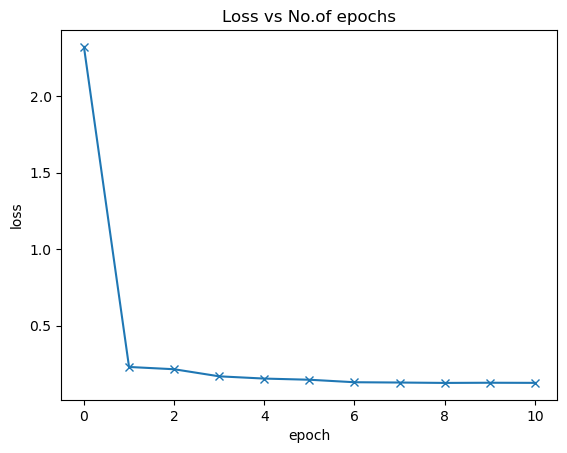

In [56]:
losses=[x['val_loss'] for x in history]
plt.plot(losses,'-x')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss vs No.of epochs')

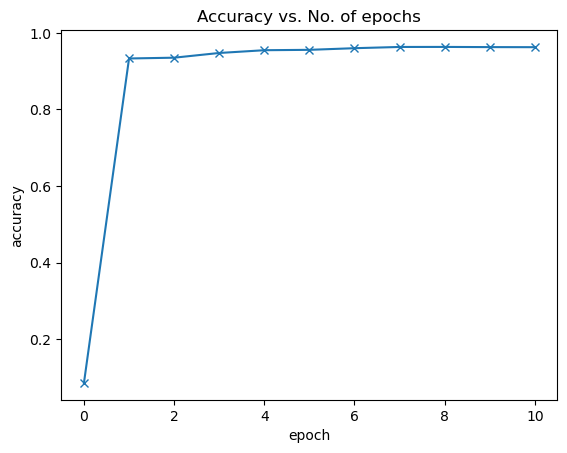

In [57]:
accuracies = [x['val_acc'] for x in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [58]:
# Define test dataset
test_dataset = MNIST(root='data/', 
                     train=False,
                     transform=ToTensor())

In [59]:
def predict_image(img, model):
    xb = to_device(img.unsqueeze(0), device)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


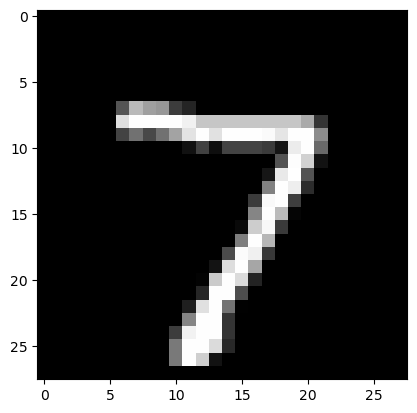

In [60]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 8 , Predicted: 3


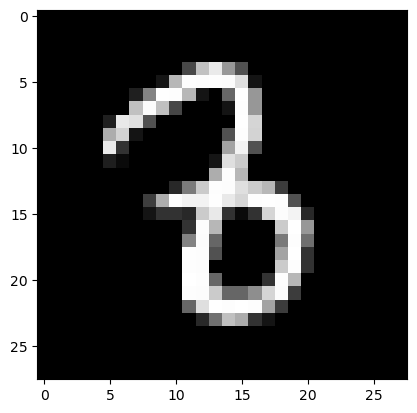

In [61]:
img, label = test_dataset[1878]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 9 , Predicted: 9


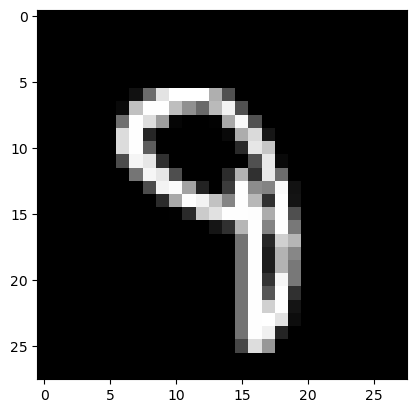

In [62]:
img, label = test_dataset[193]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 2


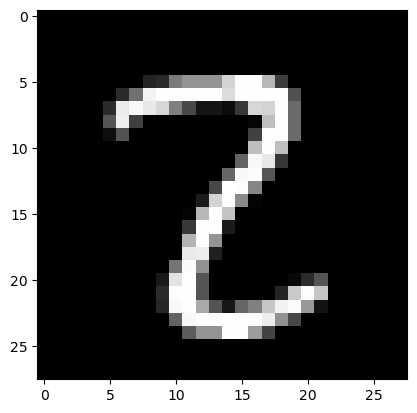

In [63]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 3 , Predicted: 3


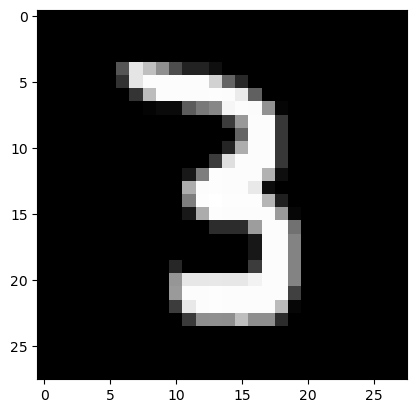

In [66]:
img, label = test_dataset[686]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [67]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size=256), device)
result = evaluate(model, test_loader)
result

{'val_loss': 0.10859738290309906, 'val_acc': 0.967089831829071}